In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")
sub = pd.read_csv("data/titanic/gender_submission.csv")

<AxesSubplot:>

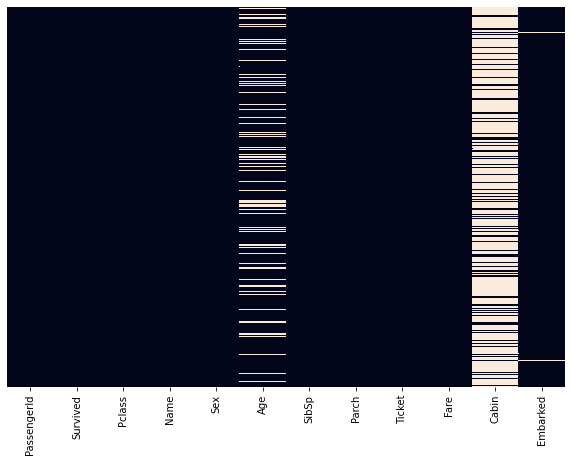

In [3]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

<AxesSubplot:>

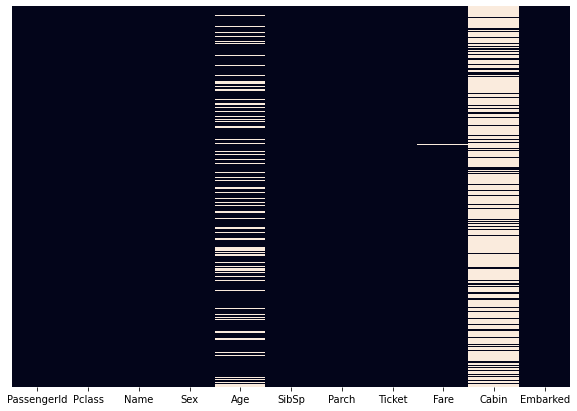

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

<AxesSubplot:xlabel='Survived', ylabel='count'>

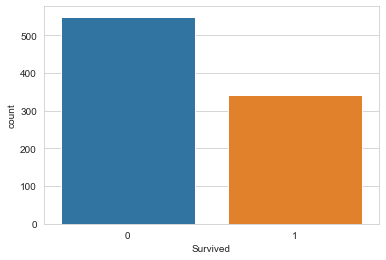

In [5]:
# 생존자와 사망자의 비율
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

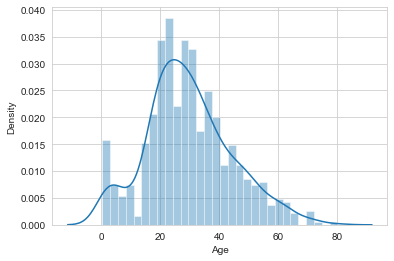

In [6]:
# 나이 분포
sns.distplot(train['Age'].dropna(), bins=30)
# 20~50대가 많음. 어린아이도 있음.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


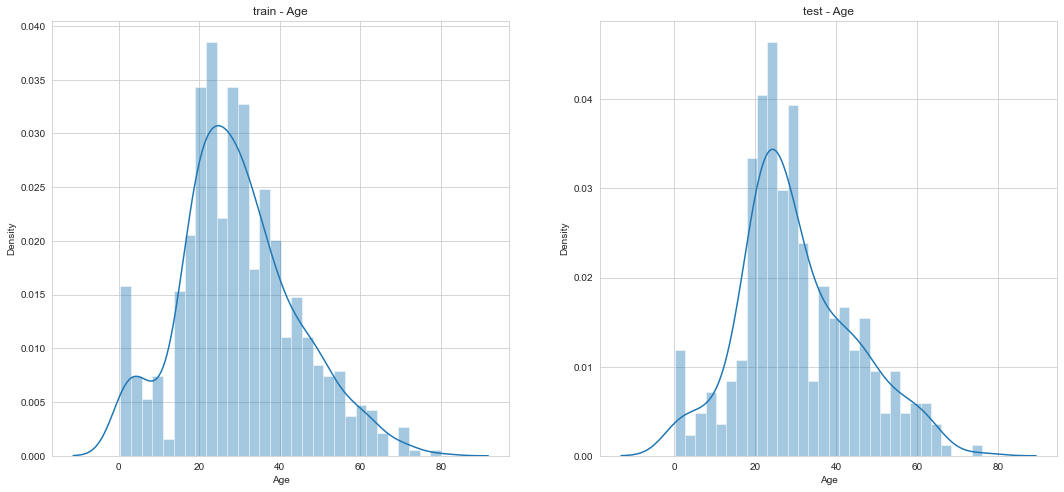

In [7]:
# 데이터(train, test)를 비교해 보기

f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30,ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30,ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

In [8]:
# 데이터 결측치 확인 후, 이를 처리해보자
print( train.info() )   # train 에서는 Age, Cabin, Embarked 
print()
print( test.info() )    # test 에서는 Age, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [9]:
# Age에 대한 처리
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [10]:
# Age에 대한 결측치가 처리되었는지 확인
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
# 승선항(Embarked) 처리
train['Embarked'].value_counts()

# S = Southampton 의 승선한 사람들이 많다.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Embarked'] = train['Embarked'].fillna('S')

In [12]:
# Test 데이터의 Fare(탑승료) 처리
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [15]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [16]:
# 데이터 결측치 처리가 잘 되었는지 확인
print( train.info() )   
print()
print( test.info() )    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [17]:
# 데이터를 나눠서 평가를 해 보자.

sel = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

all_X = train[sel]
all_y = train['Survived']

last_X_test = test[sel]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_y,    
                                                    stratify=all_y,
                                                    test_size=0.3,
                                                    random_state=77 )

In [20]:
# 모델 만들고 평가
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train, y_train)
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_tr, acc_test

(1.0, 0.6044776119402985)

##### 실습
* 의사결정트리의 하이퍼 파리미터를 활용하여 좋은 모델을 선택하고 이를 적용하여 제출해 보자.

In [21]:
depth_param = range(1,10)

for i in depth_param:
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    print("max_depth : {} , 정확도 : {} {}".format(i, acc_tr, acc_test) )

max_depth : 1 , 정확도 : 0.6211878009630819 0.5970149253731343
max_depth : 2 , 정확도 : 0.6918138041733547 0.6604477611940298
max_depth : 3 , 정확도 : 0.7255216693418941 0.664179104477612
max_depth : 4 , 정확도 : 0.7512038523274478 0.6977611940298507
max_depth : 5 , 정확도 : 0.7688603531300161 0.7126865671641791
max_depth : 6 , 정확도 : 0.8009630818619583 0.6753731343283582
max_depth : 7 , 정확도 : 0.8298555377207063 0.667910447761194
max_depth : 8 , 정확도 : 0.8667736757624398 0.667910447761194
max_depth : 9 , 정확도 : 0.9069020866773676 0.6343283582089553


In [22]:
model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
model.fit(all_X, all_y)
pred = model.predict(last_X_test)
sub['Survived'] = pred
sub.to_csv("tree_second_sub.csv", index=False)  # 0.65879

In [23]:
import os
files = os.listdir()
print("파일 유무 확인 : ", "tree_second_sub.csv" in files)

파일 유무 확인 :  True


##### 실습
 * LogisticRegression, LinearSVC, Knn 모델을 만들고, 가장 성능이 좋은 모델로 제출해 보자

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = LogisticRegression().fit(X_train, y_train)
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_tr, acc_test

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6918138041733547, 0.7164179104477612)

In [26]:
model = LinearSVC().fit(X_train, y_train)
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_tr, acc_test

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(0.6629213483146067, 0.6753731343283582)

In [27]:
model = KNeighborsClassifier().fit(X_train, y_train)
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_tr, acc_test

(0.7367576243980738, 0.6268656716417911)

In [28]:
model = LogisticRegression()
model.fit(all_X, all_y)
pred = model.predict(last_X_test)
sub['Survived'] = pred
sub.to_csv("third_lgreg_sub.csv", index=False) 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
files = os.listdir()
print("파일 유무 확인 : ", "third_lgreg_sub.csv" in files)  # 0.66746

파일 유무 확인 :  True


### First Sub Score: 0.60765
### Second Sub Score: 0.66985
### Third Sub Score: 0.66507